In [ ]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

# Colisiones 2D de duración finita

In [ ]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
               # print(self.RrVector)
            
    def CalculateForce(self, particle, K):
        norma = np.norm(self.r-particle.self.r)
        force = np.zeros(self.r)
        if norma<self.radius+particle.self.radius:
            force = K*np.power(norma,2)*(self.r-particle.self.r)

In [ ]:
# Discretization
dt = 0.0001
tmax = 10
t = np.arange(0,tmax+dt,dt)
print(len(t))

In [ ]:
def GetPotentialEnergy(r,Particles):
    U = 0
    for i in Particles:
        

In [ ]:
def GetParticles(NParticles,Limit,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

# Tiempo libre medio

# Termodinámica

In [5]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
A=0.01
k=389.6
l=0.30
R = 8.3145
cv = 1.5*R
n = 1

In [7]:
C = k*A/(n*cv*l)

In [8]:
r0 = [400,200] #T10=400K, T20=200K
def f0(T1,T2,C):
    return -C*(T1-T2)

def f1(T1,T2,C):
    return C*(T1-T2)

In [12]:
def GetEuler(f0,f1,r0,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    T1 = np.zeros(len(t))
    T2 = np.zeros(len(t))
    
    T1[0] = r0[0]
    T2[0] = r0[1]
    
    K1 = np.zeros(2)
    
    for i in range( 1, len(t) ):
        
        K1[0] = f0(T1[i-1],T2[i-1],C)
        K1[1] = f1(T1[i-1],T2[i-1],C)
        
        T1[i] = T1[i-1] + h*K1[0]
        T2[i] = T2[i-1] + h*K1[1]
        
    return T1,T2

In [13]:
N = 50
t = np.linspace(0.,15.,N)

T1,T2 = GetEuler(f0,f1,r0,t)

<IPython.core.display.Javascript object>


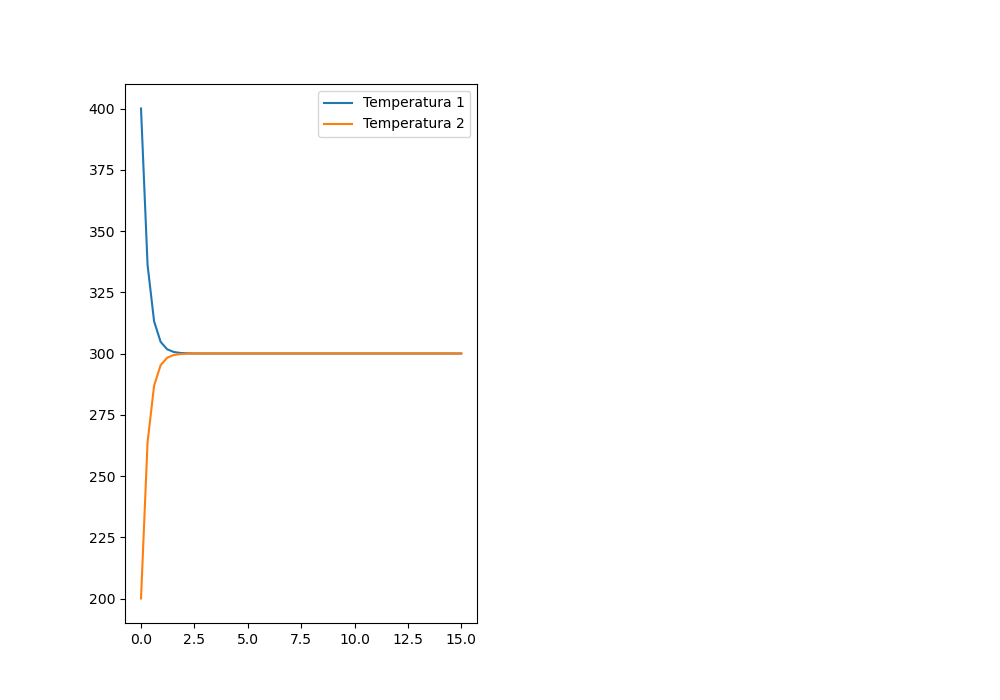

In [14]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)
ax.plot(t,T1, label='Temperatura 1')
ax.plot(t,T2, label='Temperatura 2')
ax.legend()